In [1]:
import pandas as pd
import os
import mne
import numpy as np
import seaborn as sns
import matplotlib.pyplot

In [2]:
df_list = []
fatigue_count = 0
normal_count = 0
total_count =0
for i in range(1,2):
    #f = open(str(i))
    filename = (f'Fatigue state{(i)}.cnt')
    f = mne.io.read_raw_cnt(filename)
    df_fatigue=f.to_data_frame()
    #df_fatigue.info()
    df_fatigue['fatigue']=1
    #df_fatigue.info()
    df_list.append(df_fatigue)
    fatigue_count +=1
    filename = (f'Normal state{(i)}.cnt')
    f = mne.io.read_raw_cnt(filename)
    df_normal = f.to_data_frame()
    df_normal['fatigue']=0
    df_normal
    df_list.append(df_normal)
    normal_count +=1
    
print(fatigue_count)
print(normal_count)

<ipython-input-2-8ac215317ede>:8: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
C:\Users\olive\anaconda3\lib\site-packages\mne\io\cnt\cnt.py:241: RuntimeWarning: overflow encountered in long_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
<ipython-input-2-8ac215317ede>:8: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-2-8ac215317ede>:16: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  f = mne.io.read_raw_cnt(filename)
<ipython-input-2-8ac215317ede>:16: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  f = mne.io.read_raw_cnt(filename)


1
1


#### Creating complete dataset

In [3]:
df_list

[          time         HEOL      HEOR         FP1      FP2         VEOU  \
 0            0   732.635240 -0.250967    0.000000  0.00000 -1600.416177   
 1            1    16.563818 -0.376450 -522.073977 -0.37645  1301.891002   
 2            2   735.207651 -0.250967    0.000000  0.00000 -1605.121807   
 3            3    29.237649 -0.376450 -518.560440 -0.37645  1299.883266   
 4            4   736.148777 -0.250967    0.000000  0.00000 -1615.850644   
 ...        ...          ...       ...         ...      ...          ...   
 601035  601035   352.294842 -0.376450 -359.447400 -0.37645  1584.730743   
 601036  601036  1105.007437 -0.250967    0.000000  0.00000 -1580.213338   
 601037  601037   353.549677 -0.376450 -354.365319 -0.37645  1587.303154   
 601038  601038  1109.462100 -0.250967    0.000000  0.00000 -1571.868687   
 601039  601039   358.819983 -0.376450 -353.235968 -0.37645  1592.887169   
 
             VEOL           F7        F3           FZ  ...        T6  \
 0      -0.250

In [4]:
df_full = pd.concat(df_list)

In [5]:
df_full = df_full.filter(['T6','P3','TP7','O1','OZ','T4','T5','FC3','FCZ','CP3','fatigue'])

In [6]:
df_full

T6           P3       TP7       O1          OZ           T4  \
0      -0.250967  -554.448712 -0.313709 -0.37645  512.913684   859.059836   
1      -0.313709  1782.931884 -0.439192  0.00000    0.000000  1271.022068   
2      -0.250967  -574.337842 -0.313709 -0.37645  508.333537   870.290606   
3      -0.313709  1782.053500 -0.439192  0.00000    0.000000  1265.939987   
4      -0.250967  -585.631355 -0.313709 -0.37645  505.321934   882.274278   
...          ...          ...       ...      ...         ...          ...   
600875 -0.188225 -1659.769858 -0.313709  0.00000    0.000000   783.895237   
600876 -0.188225   600.814855 -0.313709 -0.37645 -220.976391 -1140.958451   
600877 -0.188225 -1658.891474 -0.313709  0.00000    0.000000   783.079595   
600878 -0.188225   602.634365 -0.313709 -0.37645 -218.780430 -1140.331034   
600879 -0.188225 -1656.570030 -0.313709  0.00000    0.000000   784.961847   

              T5          FC3       FCZ          CP3  fatigue  
0      -0.313709   431.914104 -0.188225   179.692329        1  
1      -0.250967     0.000000  0.000000  1459.623723        1  
2      -0.313709   428.024116 -0.188225   172.226063        1  
3      -0.250967     0.000000  0.000000  1461.756942        1  
4      -0.313709   426.204606 -0.188225   176.680726        1  
...          ...          ...       ...          ...      ...  
600875 -0.188225     0.000000  0.000000   218.403980        0  
600876 -0.313709  1828.294158 -0.188225 -1581.907365        0  
600877 -0.188225     0.000000  0.000000   218.027529        0  
600878 -0.313709  1829.548993 -0.188225 -1580.966239        0  
600879 -0.188225     0.000000  0.000000   220.160748        0  

[1201920 rows x 11 columns]

## Visualizing data

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201920 entries, 0 to 600879
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   T6       1201920 non-null  float64
 1   P3       1201920 non-null  float64
 2   TP7      1201920 non-null  float64
 3   O1       1201920 non-null  float64
 4   OZ       1201920 non-null  float64
 5   T4       1201920 non-null  float64
 6   T5       1201920 non-null  float64
 7   FC3      1201920 non-null  float64
 8   FCZ      1201920 non-null  float64
 9   CP3      1201920 non-null  float64
 10  fatigue  1201920 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 110.0 MB


In [8]:
df_full.describe()

T6            P3           TP7            O1            OZ  \
count  1.201920e+06  1.201920e+06  1.201920e+06  1.201920e+06  1.201920e+06   
mean  -2.376513e-01  1.923661e+02 -3.450837e-01 -1.835512e-01  1.297272e+02   
std    5.125101e-02  1.406212e+03  5.433837e-02  1.842298e-01  2.655353e+02   
min   -3.137087e-01 -2.055921e+03 -4.391921e-01 -3.764504e-01 -2.858513e+02   
25%   -3.137087e-01 -5.210074e+02 -4.391921e-01 -3.764504e-01  0.000000e+00   
50%   -2.509669e-01  6.311191e+02 -3.137087e-01 -1.568543e-01  0.000000e+00   
75%   -1.882252e-01  1.829235e+03 -3.137087e-01  0.000000e+00  4.800998e+02   
max   -1.882252e-01  2.055858e+03 -3.137087e-01  0.000000e+00  7.289962e+02   

                 T4            T5           FC3           FCZ           CP3  \
count  1.201920e+06  1.201920e+06  1.201920e+06  1.201920e+06  1.201920e+06   
mean   3.221495e+02 -2.773273e-01 -6.975684e+01 -9.411260e-02  2.665994e+01   
std    1.237604e+03  3.984672e-02  9.303108e+02  9.411264e-02  1.110674e+03   
min   -2.055921e+03 -3.137087e-01 -2.055921e+03 -1.882252e-01 -1.627144e+03   
25%   -1.130355e+03 -3.137087e-01  0.000000e+00 -1.882252e-01 -9.153549e+02   
50%    9.793357e+02 -2.823378e-01  0.000000e+00 -9.411260e-02  1.813864e+02   
75%    1.426825e+03 -2.509669e-01  5.031260e+02  0.000000e+00  1.422685e+03   
max    2.055858e+03 -1.882252e-01  2.055858e+03  0.000000e+00  1.663095e+03   

            fatigue  
count  1.201920e+06  
mean   5.000666e-01  
std    5.000002e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+00  
75%    1.000000e+00  
max    1.000000e+00

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fatigue', ylabel='count'>

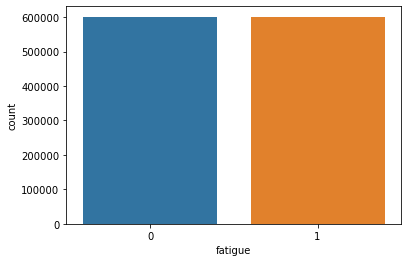

In [9]:
sns.countplot('fatigue',data=df_full)

<AxesSubplot:title={'center':'CP3'}, xlabel='fatigue'>

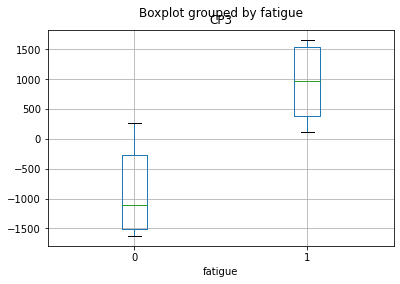

In [10]:
df_full.boxplot('CP3','fatigue')

##### Still need to create EEG specific visualization

### Normalizing the data

In [11]:
normalized_df_full=(df_full-df_full.min())/(df_full.max()-df_full.min())

In [12]:
normalized_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201920 entries, 0 to 600879
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   T6       1201920 non-null  float64
 1   P3       1201920 non-null  float64
 2   TP7      1201920 non-null  float64
 3   O1       1201920 non-null  float64
 4   OZ       1201920 non-null  float64
 5   T4       1201920 non-null  float64
 6   T5       1201920 non-null  float64
 7   FC3      1201920 non-null  float64
 8   FCZ      1201920 non-null  float64
 9   CP3      1201920 non-null  float64
 10  fatigue  1201920 non-null  float64
dtypes: float64(11)
memory usage: 142.3 MB


# Training the Algorithm

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X = normalized_df_full.drop('fatigue',axis=1)

In [15]:
y = normalized_df_full['fatigue']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)

In [19]:
X_train.shape

(961536, 10)

In [20]:
X_test.shape

(240384, 10)

In [21]:
y_train.shape

(961536,)

In [22]:
y_test.shape

(240384,)

## Classifier 

In [23]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Classifier end

## Testing the Model

In [24]:
y_predict = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
cm = confusion_matrix(y_predict,y_test)

<AxesSubplot:>

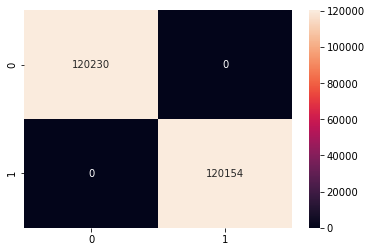

In [27]:
sns.heatmap(cm,annot=True,fmt='d')

In [28]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    120230
         1.0       1.00      1.00      1.00    120154

    accuracy                           1.00    240384
   macro avg       1.00      1.00      1.00    240384
weighted avg       1.00      1.00      1.00    240384



In [29]:
cm

array([[120230,      0],
       [     0, 120154]], dtype=int64)